# View GCaMP mismatch closed loop and open loop data

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.stats import pearsonr, spearmanr
from analysis_functions import *
from model_functions import *
import matplotlib.patches as patches
import seaborn as sns

In [78]:
RunTresholdDict = {'B3M1': 145, 'B3M2': 295, 'B3M3': 325, 'B2M4': 110, 'B2M5': 180}

In [79]:
GCaMP_closedopen_1 = pd.read_csv('/Users/hildeteigen/Downloads/B3M3_G8_MMclosed_session1.csv', dtype=dtype_dict)
GCaMP_closedopen_2 = pd.read_csv('/Users/hildeteigen/Downloads/B3M3_G8_MMclosed_session1.csv', dtype=dtype_dict)

In [80]:
#Make sure the index provides inforamtion of seconds since start
GCaMP_closedopen_1.set_index('Seconds', inplace=True)
GCaMP_closedopen_2.set_index('Seconds', inplace=True)



In [81]:
#Make sure theres a column for session number:
if 'session' not in GCaMP_closedopen_1.columns:
    GCaMP_closedopen_1['Session'] = 'day1'
if 'session' not in GCaMP_closedopen_2.columns:
    GCaMP_closedopen_2['Session'] = 'day2'

In [82]:
#Have a look that the data is as expected
GCaMP_closedopen_1

,470_dfF,movementX,movementY,event,ExperimentEvents,mouseID,sex,area,No_halt,LinearMismatch_block,LinearPlaybackMismatch_block,Session
Seconds,,,,,,,,,,,,
0.000,-0.000071,0.007848,0.003241,False,NaN,B3M3,F,V1,False,False,False,day1
0.001,-0.000228,0.025288,0.010443,False,NaN,B3M3,F,V1,False,False,False,day1
0.002,-0.000385,0.042729,0.017645,False,NaN,B3M3,F,V1,False,False,False,day1
0.003,-0.000542,0.060169,0.024846,False,NaN,B3M3,F,V1,False,False,False,day1
0.004,-0.000699,0.077609,0.032048,False,NaN,B3M3,F,V1,False,False,False,day1
...,...,...,...,...,...,...,...,...,...,...,...,...
1916.987,-0.111214,0.008763,0.000103,False,NaN,B3M3,F,V1,False,False,False,day1
1916.988,-0.094787,0.006652,0.000078,False,NaN,B3M3,F,V1,False,False,False,day1
1916.989,-0.078361,0.004540,0.000054,False,NaN,B3M3,F,V1,False,False,False,day1


In [83]:
# Chaning event name to halt and making it so that its True when there is a halt
#GCaMP_closedopen_1.loc[:, 'event'] = GCaMP_closedopen_1['event'].replace({False: True, True: False})
GCaMP_closedopen_1.rename(columns = {'event': 'halt'}, inplace = True)
GCaMP_closedopen_2.rename(columns = {'event': 'halt'}, inplace = True)

In [84]:
#Check that the same mice are in the datsets
print(GCaMP_closedopen_1.mouseID.unique())
print(GCaMP_closedopen_2.mouseID.unique())
names = GCaMP_closedopen_2.mouseID.unique()

['B3M3']
['B3M3']


# View session data
- Loop through the mouse names present in one of the dataframes (ideally they should be the same)
- save a variable where each session is saved for the current mouse
- use the view_session_mouse() funciton from analysis_functions.py to plot the Delta F/F 470 fluorescence and movement in X direction with halts in grey, and session blocks marked in colors.
- Can also add other column names to the plotlist, like eye movements and other fluorescent traces
- This is mostly to get an impression of the overall data trends.

Move the function into this file to test it.


Plotted traces for B3M3


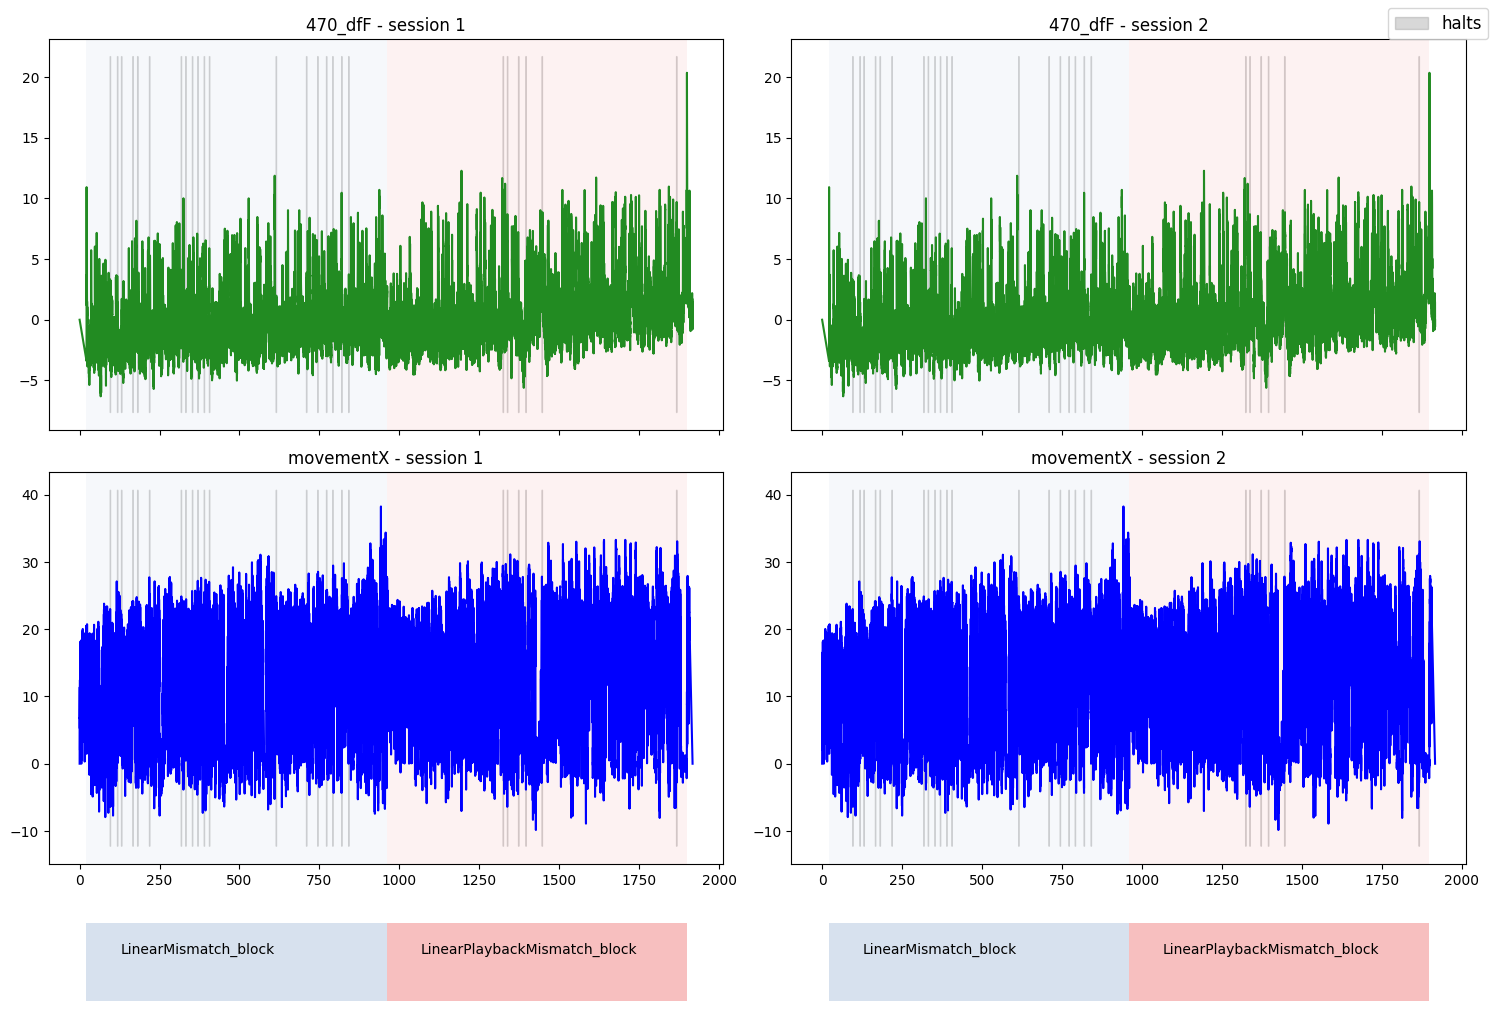

In [85]:

for mouse in GCaMP_closedopen_1.mouseID.unique():
    mousedata = {'session 1':GCaMP_closedopen_1.loc[GCaMP_closedopen_1.mouseID == mouse], 'session 2':GCaMP_closedopen_2.loc[GCaMP_closedopen_2.mouseID == mouse]}
    fig, ax = view_session_mouse(mousedata, mouse, plotlist = ['470_dfF', 'movementX'])
    fig.savefig(f'Figures/GRAB{mouse}_view_alignment.png', format = 'png', dpi = 300)
    

## Filter with respect to blocks
Use the function: filter_data(data, filters = []). 
Ensure that therere is a filter in the filterdict within the function that corresponds to the blocks and other column specified values that you want to filter by.

You can add filters by adding lines to the dict of this format:
    'filter key name': ['Relevant column name', Relevant row values to filter],

Add the same filters to the dict you define below

* Allways filter by mouse in addition to other filters, if the input data includes multiple animal recordings

In [86]:
#Filter mice to get unique indexes

# first make the dict structure
mouse_data = {'session 1':{'closedloop': {}, 'openloop':{}}, 'session 2': {'closedloop': {},'openloop': {}}}

#Then assign mouse by mouse with filtered data to the dict
for mouse in GRAB_closedopen_1.mouseID.unique():
    mouse_data['session 1']['closedloop'][mouse] = filter_data(GRAB_closedopen_1, filters = [mouse, 'closed_block'])
    mouse_data['session 1']['openloop'][mouse] = filter_data(GRAB_closedopen_1, filters = [mouse, 'open_block'])
    
for mouse in GRAB_closedopen_2.mouseID.unique():
    mouse_data['session 2']['closedloop'][mouse] = filter_data(GRAB_closedopen_2, filters = [mouse, 'closed_block'])
    mouse_data['session 2']['openloop'][mouse] = filter_data(GRAB_closedopen_2, filters = [mouse, 'open_block'])

NameError: name 'GRAB_closedopen_1' is not defined

# Align data and save to dict
Run process_mouse_data which will call align_to_event_start and align traces and structure tham into a dictionary.
Specify:
* The trace columns to align and not baseline
* The trace columns to align and basline (can be the same as the former)
* The event column (bool column, halt, No_halt, or other)
* Saving the event times means that the data can be analysed as a function of what time during the experiment that the halt appeared

In [ ]:
# Example input data (assuming `aligned_data` is structured as needed)
trace_columns_to_baseline = ['470_dfF']  # Columns to baseline
trace_columns_no_baseline = ['movementY', 'movementX']  # Columns to leave unaltered
event_col = 'halt'

# Process the data
aligned_data = process_mouse_data(mouse_data, trace_columns_to_baseline, trace_columns_no_baseline, event_col, [1, 2])

event_col = 'No_halt'
aligned_data_nohalt = process_mouse_data(mouse_data, trace_columns_to_baseline, trace_columns_no_baseline, event_col, [1, 2])

In [ ]:
aligned_data['session 1']['closedloop'][names[0]]

In [ ]:
plot_compare_blocks(aligned_data['session 1'], '470_dfF_bsl')
plot_compare_blocks(aligned_data['session 2'], '470_dfF_bsl')


In [ ]:
plot_compare_blocks(aligned_data['session 1'], 'movementX')
plot_compare_blocks(aligned_data['session 2'], 'movementX')

# Plot across mouse means
Make dicts with mouse mean data depending on session and blocks, and make also a dict with the controls.

Use these to plot the across mouse means using the plot_mean_across_blocks function.

In [ ]:
mouse_mean_session_data = mouse_mean_bsl_data(aligned_data, '470_dfF_bsl')
mouse_mean_control_data = mouse_mean_bsl_data(aligned_data_nohalt, '470_dfF_bsl')


In [ ]:
# plotting dicts
session1_blocks = {'closedloop': mouse_mean_session_data['session 1']['closedloop'],
                  'openloop': mouse_mean_session_data['session 1']['openloop']}
control1_blocks = {'closedloop': mouse_mean_control_data['session 1']['closedloop']}

session2_blocks = {'closedloop': mouse_mean_session_data['session 2']['closedloop'],
                  'openloop': mouse_mean_session_data['session 2']['openloop']}
control2_blocks = {'closedloop': mouse_mean_control_data['session 2']['closedloop']}

In [ ]:

# Plot the data
plot_mean_across_blocks(session1_blocks, control1_blocks, title="Session 1 blocks")
plot_mean_across_blocks(session2_blocks, control1_blocks, title="Session 2 blocks")


# Compute statistics
Use the compute_trace_statistics to get some paramters from the data. 
It will return the peak, mean, median and standard deviation for each aligned trace chunk during the time windows 0-1s, 1-2s, and -1-0s.
* Specify the aligned trace that you want statistics for
* In addition you can specify some other traces for which you will get the mean during, after, and before (same time intervals)

* Consider doing this for multiple main traces. Then add a column named for example 'trace' where the main trace name is the value of each row. Combe them all in one df.

In [ ]:
# Specify the main trace and co-traces
main_trace = "470_dfF_bsl"
co_traces = ["movementX", "movementY"]
ranges = [(-1, 0), (0, 1), (1, 2)]

# Compute statistics
stats_470_main_df = compute_trace_statistics(aligned_data,trace=main_trace,co_traces=co_traces,ranges=ranges,)


stats_470_nohalt_df = compute_trace_statistics(aligned_data_nohalt,trace=main_trace,co_traces=co_traces,ranges=ranges,)
# Before combinind datasets, introduce a column to seperate the types of data. 
# Can also be control True and False or other specific event that makes the datsets different
stats_470_main_df['halt'] = True
stats_470_nohalt_df['halt'] = False

# Combine both datasets 
all_470_stats_df = pd.concat([stats_470_main_df, stats_470_nohalt_df], ignore_index=True)
all_470_stats_df

In [ ]:
all_470_stats_df.to_csv('saved_data/GCaMP_closedopenMM_all_470_stats_df.csv', index = False)

In [ ]:
##Consider adding to the fitted model a continous variable which is the time column
#EventTime should currently be seconds from session start

##  Possible: Look for correlation between running and fluorescence changes

In [ ]:
subset = filter_data(GCaMP_closedopen_1, [names[0], 'day1'])

In [ ]:
GCaMP_closedopen_1

In [ ]:
# Compute Pearson correlation
pearson_corr, pearson_pval = pearsonr(subset['movementX'], subset['470_dfF'])

# Compute Spearman correlation (handles nonlinear relationships better)
spearman_corr, spearman_pval = spearmanr(subset['movementX'], subset['470_dfF'])

print(f"Pearson correlation: {pearson_corr}, p-value: {pearson_pval}")
print(f"Spearman correlation: {spearman_corr}, p-value: {spearman_pval}")

In [ ]:
resampled = subset.sample(10000, random_state=9)  # Sample 10,000 rows
pearson_corr, pearson_pval = pearsonr(resampled['movementX'], resampled['470_dfF'])
spearman_corr, spearman_pval = spearmanr(resampled['movementX'], resampled['470_dfF'])
print(f"Subset Pearson correlation: {pearson_corr}, p-value: {pearson_pval}")
print(f"Subset Spearman correlation: {spearman_corr}, p-value: {spearman_pval}")